In [44]:
import numpy as np
import math
import matplotlib.pyplot as plt

## 특수 행렬
1. **Random numbers Mat**: `np.random.randn(# of rows, # of cols)`
1. **Diagonal Mat**: `np.diag()`
  - 인자로 Mat을 넣으면, Diagonal element
  - 인자로 Vec을 넣으면, Diagonal matrix
1. **Tri Mat**: `np.tri(u/l)(Mat)`
  - 인자로 Mat을 넣고, 위 또는 아래 삼각형을 출력
1. **Identity Mat**: `np.eye()`
1. **Zeros Mat**: `np.zeros()`


## 기타 메모
### Shifting Matrix
> Square Matrix에 스칼라를 더하는 방식

> <-> 모든 원소에 스칼라를 더하는 게 아님

`A + scalar*np.eye(len(A))`

### Hadamard product
> 대응하는 원소끼리의 곱: `np.multiply()` or `A*B`


## [Problem 4-1]

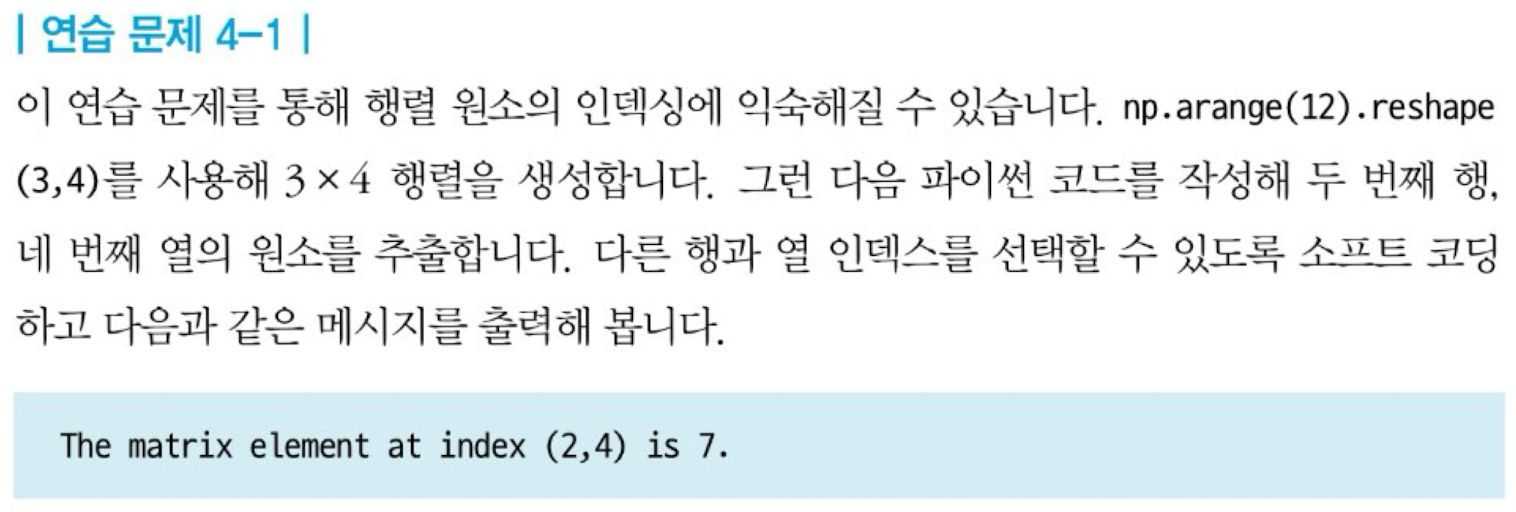

In [45]:
A = np.arange(12).reshape(3, 4)
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [46]:
# (2,4) element 출력
A[1, 3]

7

In [47]:
1num_row = int(input('출력하고자 하는 행을 입력해 주세요.: '))
num_col = int(input('출력하고자 하는 열을 입력해 주세요.: '))

print(f'The matrix element at index ({num_row}, {num_col}) is {A[num_row-1, num_col-1]}.')

출력하고자 하는 행을 입력해 주세요.: 2
출력하고자 하는 열을 입력해 주세요.: 1
The matrix element at index (2, 1) is 4.


## [Problem 4-2]

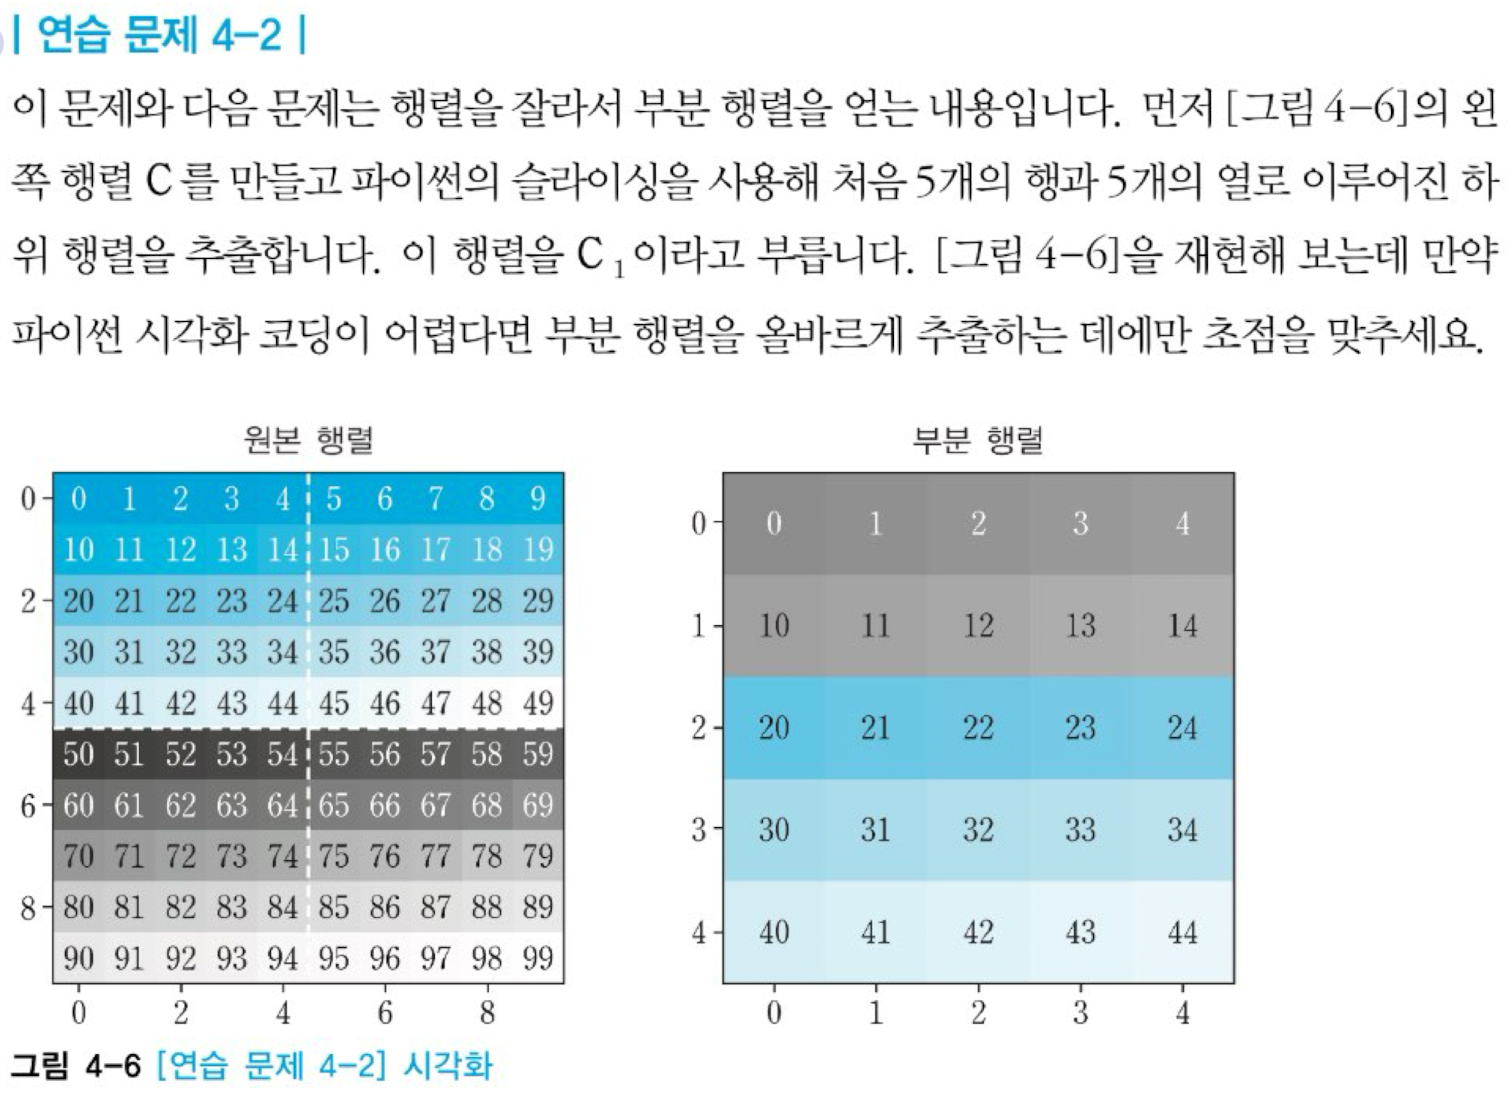

In [48]:
C = np.arange(100).reshape(10, 10)
C

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [49]:
C1 = C[:5, :5]
C1

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

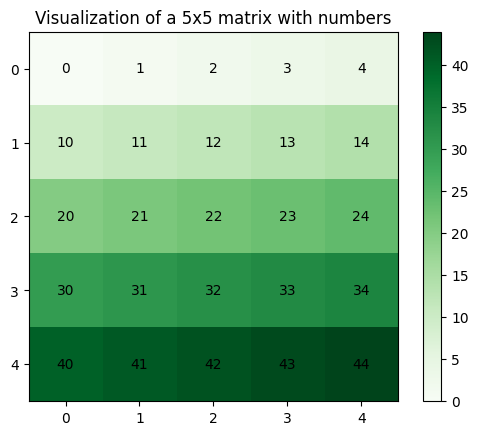

In [50]:
plt.imshow(C1, cmap='Greens', interpolation='none')
plt.colorbar()
plt.title('Visualization of a 5x5 matrix with numbers')

# Adding text annotations to show the element values in the matrix
for i in range(C1.shape[0]):
    for j in range(C1.shape[1]):
        plt.text(j, i, C1[i, j], ha='center', va='center', color='black')

plt.show() # 에폭은 초록색
# 근데 대파 같다

## [Problem 4-6]

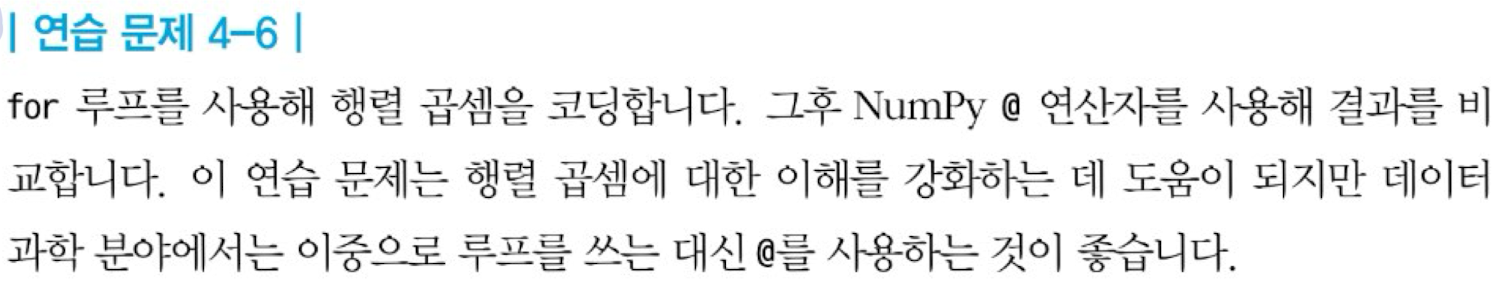

In [51]:
np.random.seed(0)

A = np.random.randn(5, 4)
B = np.random.randn(4, 5)

In [57]:
result = np.zeros((A.shape[0], B.shape[1]))

for i in range(A.shape[0]):
  for j in range(B.shape[1]):
    result[i, j] = np.sum(A[i, :] * B[:, j])

result

array([[-4.58356831,  4.29840006,  3.27550293, -3.50250407,  3.57399746],
       [-3.22298792,  1.34902631,  0.77185155, -4.70729451,  2.51813496],
       [-0.08395035,  1.79497364,  1.45462581, -0.14263786, -0.12071035],
       [-1.99893643,  1.08136493,  0.6422408 , -1.38675838,  1.65085707],
       [-3.60102148,  0.03477457,  0.0250538 , -1.71262476,  3.23901723]])

### Double-Check

In [62]:
np.round(result, 3) == np.round(A@B, 3) # GOOD!

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

## [Problem 4-7]

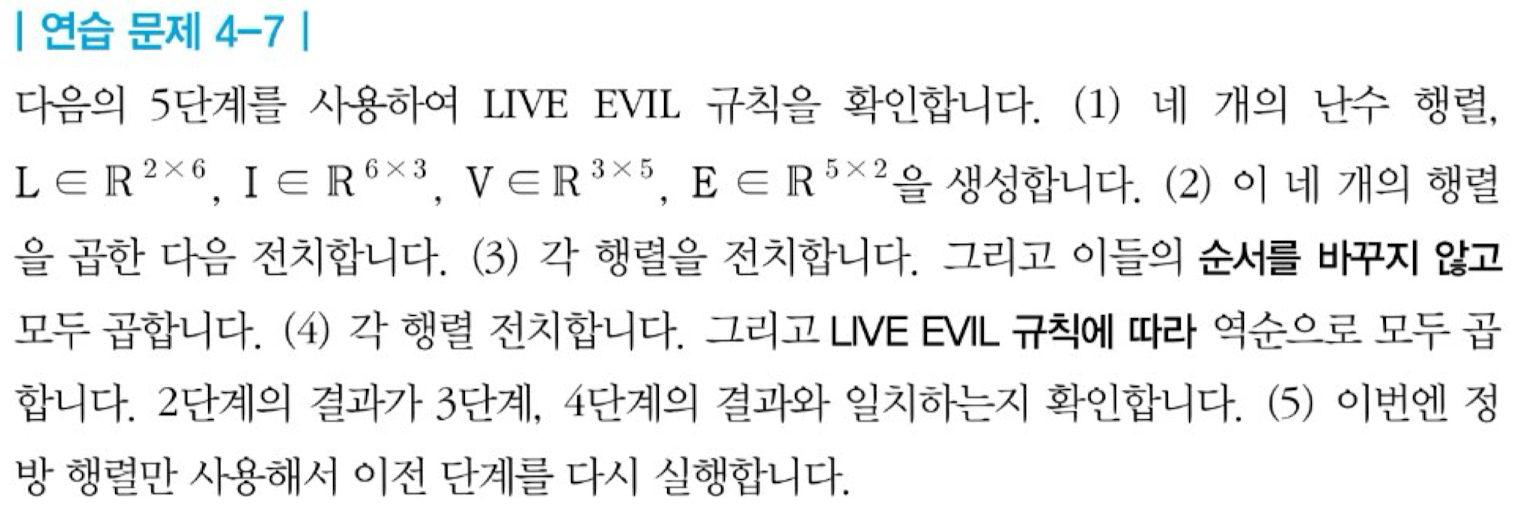

### (1) Random numbers Matrix

In [64]:
L = np.random.randn(2, 6)
I = np.random.randn(6, 3)
V = np.random.randn(3, 5)
E = np.random.randn(5, 2)

### (2) 네 개의 행렬 곱한 후 transpose

In [65]:
(L @ I @ V @ E).T

array([[ -2.37620697,  -0.66563268],
       [  5.93538364, -12.25292632]])

### (3) 각 행렬 transpose

In [66]:
# L.T @ I.T @ V.T @ E.T


# Error

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

### (4) 각 행렬을 transpose 후 역순 곱

In [67]:
E.T @ V.T @ I.T @ L.T

array([[ -2.37620697,  -0.66563268],
       [  5.93538364, -12.25292632]])

### (5) Square Matrix만 사용해서 다시 실행

In [68]:
L = np.random.randn(4, 4)
I = np.random.randn(4, 4)
V = np.random.randn(4, 4)
E = np.random.randn(4, 4)

In [71]:
print(f'1st:\n{(L @ I @ V @ E).T}\n2nd:\n{L.T @ I.T @ V.T @ E.T}\n3rd:\n{E.T @ V.T @ I.T @ L.T}')

1st:
[[  6.35209596   1.262116     4.18912292   1.70217519]
 [-11.97644723   2.56306722  -6.10654403  -2.48710601]
 [  5.61666687  -6.53965453   0.77691153   0.21255954]
 [ -1.09710537   3.28753066  -0.40066403  -0.88603538]]
2nd:
[[ -6.86969315  -0.36286175   8.79973109 -13.61449161]
 [ 15.76819339  -3.57749701 -15.25013232  23.07653646]
 [ 25.45482985 -13.88546942 -16.43666466  21.78969178]
 [ 16.58371988  -5.0290649  -14.67510087  21.89252913]]
3rd:
[[  6.35209596   1.262116     4.18912292   1.70217519]
 [-11.97644723   2.56306722  -6.10654403  -2.48710601]
 [  5.61666687  -6.53965453   0.77691153   0.21255954]
 [ -1.09710537   3.28753066  -0.40066403  -0.88603538]]


Square matrix인 경우 2nd 연산이 에러는 나지 않지만, 값이 혼자 다름을 확인.

## [Problem 4-8]

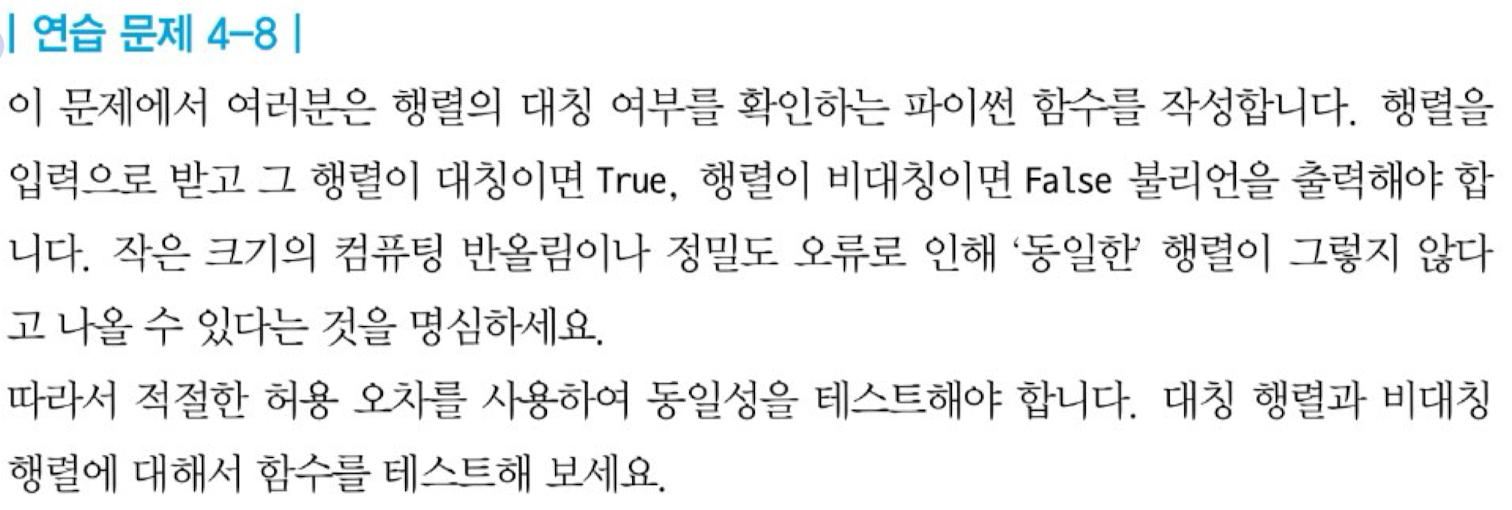

In [73]:
X = np.random.randn(5, 5)
X # non-symmetrix matrix

array([[ 0.77179055,  0.82350415,  2.16323595,  1.33652795, -0.36918184],
       [-0.23937918,  1.0996596 ,  0.65526373,  0.64013153, -1.61695604],
       [-0.02432612, -0.73803091,  0.2799246 , -0.09815039,  0.91017891],
       [ 0.31721822,  0.78632796, -0.4664191 , -0.94444626, -0.41004969],
       [-0.01702041,  0.37915174,  2.25930895, -0.04225715, -0.955945  ]])

In [75]:
S = X@X.T
S # symmetrix matrix

array([[ 7.87601171,  3.5908182 , -0.4882055 , -1.22750011,  5.48295485],
       [ 3.5908182 ,  4.72023939, -2.15688361,  0.54159264,  3.4201263 ],
       [-0.4882055 , -2.15688361,  1.46169831, -0.99913402, -0.51290893],
       [-1.22750011,  0.54159264, -0.99913402,  1.99660532, -0.32915185],
       [ 5.48295485,  3.4201263 , -0.51290893, -0.32915185,  6.16413918]])

In [82]:
def is_symmetrix(X):
  test = []

  for i in range(X.shape[0]):
    test.append(X[i, :] - X[:, i] < 1e-8) # 모든 element가 동일하다면, dimension이 (X.shape[0], X.shape[1])이고 모든 element가 True인 행렬이 출력될 것

  return(np.sum(test) == X.shape[0] * X.shape[1]) # Matrix `test`의 모든 element가 True인지 확인

In [83]:
# Non-symmetric
is_symmetrix(X)

False

In [84]:
# Symmetric
is_symmetrix(S)

True

## [Problem 4-9]

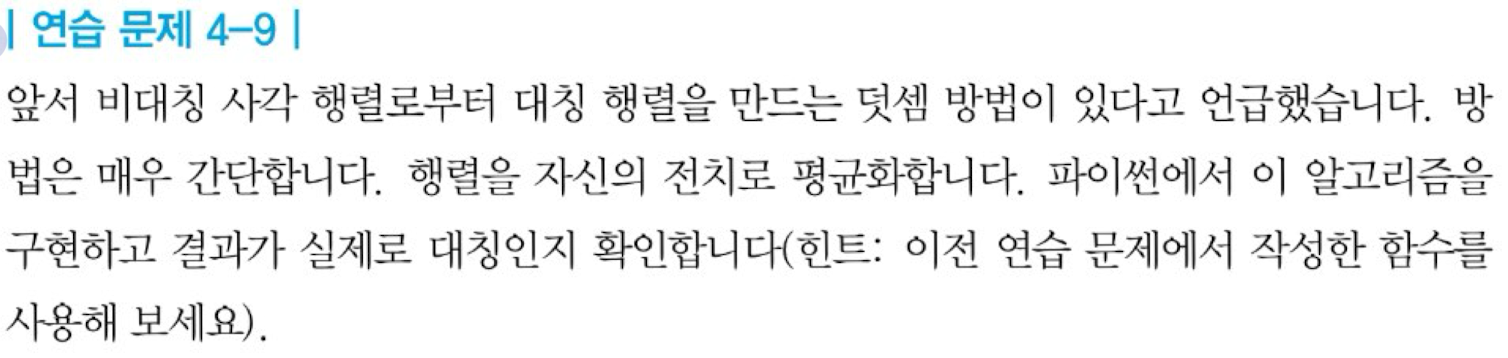

In [87]:
U = np.random.randn(4, 4) # non-symmetric
U

array([[-0.39727181, -0.13288058, -0.29779088, -0.30901297],
       [-1.67600381,  1.15233156,  1.07961859, -0.81336426],
       [-1.46642433,  0.52106488, -0.57578797,  0.14195316],
       [-0.31932842,  0.69153875,  0.69474914, -0.72559738]])

In [89]:
U_new = (U + U.T)/2
U_new

array([[-0.39727181, -0.90444219, -0.8821076 , -0.31417069],
       [-0.90444219,  1.15233156,  0.80034173, -0.06091275],
       [-0.8821076 ,  0.80034173, -0.57578797,  0.41835115],
       [-0.31417069, -0.06091275,  0.41835115, -0.72559738]])

In [90]:
is_symmetrix(U_new)

True